<a href="https://colab.research.google.com/github/SawJoel/SawJoel/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [57]:
Dt = pd.read_csv('/content/drive/MyDrive/regression/carprice.csv', sep = ";")
Dt.keys()

Index(['year', 'km_driven', 'Fuel', 'seller_type', 'transmission', 'owner',
       'selling_price'],
      dtype='object')

In [58]:
Dt.head(5)

,year,km_driven,Fuel,seller_type,transmission,owner,selling_price
0,2007,70000,1,1,1,1,60000
1,2007,50000,1,1,1,1,135000
2,2012,100000,0,1,1,1,600000
3,2017,46000,1,1,1,1,250000
4,2014,141000,0,1,1,2,450000


In [59]:
Dt.isnull().sum()

year             0
km_driven        0
Fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [60]:
import seaborn as sns

matriceCorr= Dt.corr().round(1)
matriceCorr

,year,km_driven,Fuel,seller_type,transmission,selling_price
year,1.0,-0.4,-0.1,-0.1,-0.1,0.4
km_driven,-0.4,1.0,-0.3,0.1,0.1,-0.2
Fuel,-0.1,-0.3,1.0,0.0,0.0,-0.3
seller_type,-0.1,0.1,0.0,1.0,0.2,-0.2
transmission,-0.1,0.1,0.0,0.2,1.0,-0.5
selling_price,0.4,-0.2,-0.3,-0.2,-0.5,1.0


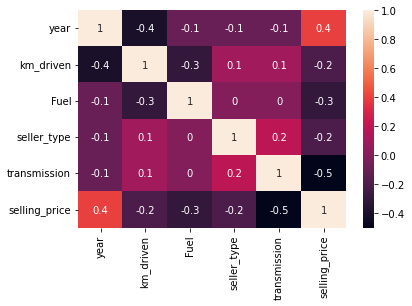

In [61]:
sns.heatmap(data =matriceCorr, annot=True)

-Il y'a une importante corrélation (0.4) entre le prix de vente et l'année. Ce qui veut dire que l'année influe beaucoup sur le prix de vente. Plus le nombre d'année est importante moins sera le prix de vente(pas sûr pour le moment mais telle est la réalité du quotidien).

-Pour le nombre de km parcourus ainsi que le seller type, leur corrélation avec le prix de vente reste faible et égale à -0.2. Leur influence donc reste faible sur le prix de vente mais indéniables vix à vis des  quelques autres paramètres.

-La corélation pour le carburant et le prix de vente reste faible comparativement à celle du km de parcours avec le prix de vente. 

-La corrélation de la transmission avec le prix de vente laisse croire que plus la transmission est faible moins cher sera le prix de vente du véhicule. 

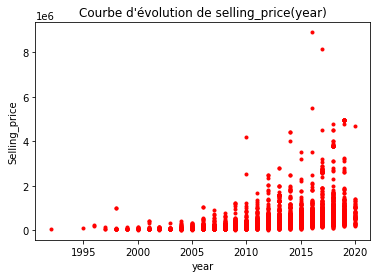

In [62]:
import numpy as np

x = np.array(Dt['year'])
y = np.array(Dt['selling_price'])
plt.xlabel('year')
plt.ylabel('Selling_price')
plt.title("Courbe d'évolution de selling_price(year)")
#plt.plot(x,y)
plt.scatter(x, y, color = 'red', marker = '.')
plt.show()


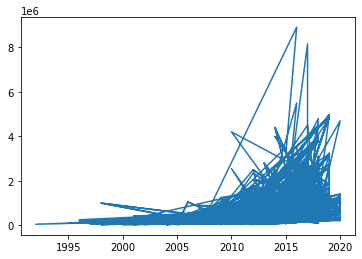

In [63]:
plt.plot(x,y)

In [ ]:
x = np.array(Dt['Fuel'])
y = np.array(Dt['selling_price'])
plt.xlabel('Fuel')
plt.ylabel('Selling_price')
plt.title("Courbe d'évolution de selling_price(year)")
plt.scatter(x, y, color = 'red', marker = '.')
plt.show()

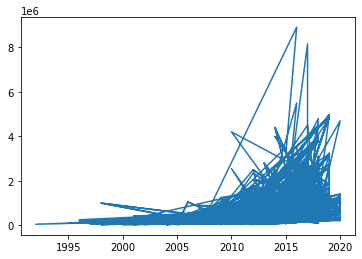

In [64]:
plt.plot(x,y)
plt.show()

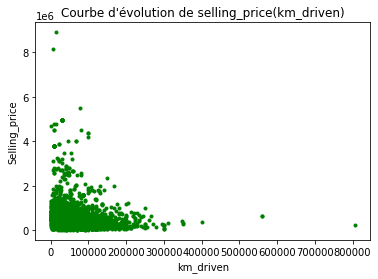

In [73]:
plt.scatter(x= np.array(Dt['km_driven']), y= np.array(Dt['selling_price']), color = 'green', marker = '.')
plt.xlabel('km_driven')
plt.ylabel('Selling_price')
plt.title("Courbe d'évolution de selling_price(km_driven)")

plt.show()


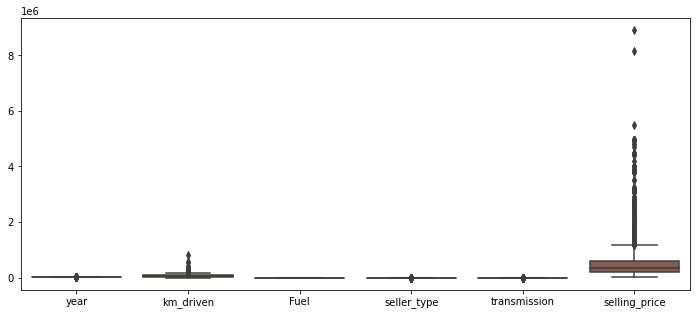

In [66]:
fig, ax= plt.subplots(figsize=(12, 5))
x=sns.boxplot(data=Dt)

**Création du vecteur Y**

In [71]:
#y = Dt.loc[:,'selling_price']
#X = Dt.iloc[ :,0:5]
#x
#y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [74]:
Y = Dt.selling_price
Y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

**Matrice contenant les colonnes 1 à 5**

In [75]:

#x = Dt.loc[:, "year": "owner"]
x = Dt.drop(['selling_price'], axis=1)
x


,year,km_driven,Fuel,seller_type,transmission,owner
0,2007,70000,1,1,1,1
1,2007,50000,1,1,1,1
2,2012,100000,0,1,1,1
3,2017,46000,1,1,1,1
4,2014,141000,0,1,1,2
...,...,...,...,...,...,...
4335,2014,80000,0,1,1,2
4336,2014,80000,0,1,1,2
4337,2009,83000,1,1,1,2
4338,2016,90000,0,1,1,1


In [81]:
Dt.set_index('owner', inplace=True) 
  
Dt = Dt.drop('Test Drive car', axis=0)

KeyError: ignored

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, Y, test_size=0.3)#, random_state=0)

In [77]:
print("Taille xtrain = ", x_train.shape)
print("Taille xtest = ", x_test.shape)
print("Taille ytrain = ", y_train.shape)
print("Taille xtest = ", y_test.shape)

Taille xtrain =  (3038, 6)
Taille xtest =  (1302, 6)
Taille ytrain =  (3038,)
Taille xtest =  (1302,)


**Modèle de régression**

In [78]:
from sklearn.linear_model import LinearRegression

from sklearn import linear_model

ml = LinearRegression()
ml.fit(x_train, y_train)            # apprentissage
ypred = ml.predict(x_test)         # prédiction sur l'ensemble de test




ValueError: ignored

Coefficients

In [ ]:
coef = ml.coef_
coef

Valeurs predites

In [ ]:
y_trainPredict = ml.predict(x_train)
y_testPredict = ml.predict (x_test)

y_testPredict

Valuer de R*R

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

R_train , R_test = r2_score(y_trainPredict, y_train) , r2_score(y_testPredict,y_test)

print (R_train* R_train , R_test * R_test)

**Analyse des résidus**

In [ ]:
Residus_test = y_test - y_testPredict
Residus_train = y_train - y_trainPredict

Residus_test.shape , x_test['year'].shape

plt.scatter(x_test['year'], Residus_test , marker='+', color= 'blue' )
plt.ylabel('Residus_test')
plt.plot

plt.scatter(x_train['year'], Residus_train , marker='x', color= 'blue' )
plt.ylabel('Residus_train')
plt.plot()
